<img src="images/seaborn.png" alt="drawing" width="1000"/>

# **Seaborn Plotting**

This notebook contains useful Seaborn plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1 Styles

In [2]:
def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.sin(x + i * .5) * (n + 2 - i) * flip)

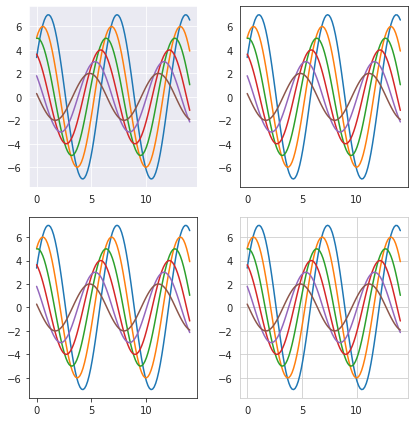

In [3]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot(6)

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot(6)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot(6)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot(6)

f.tight_layout()

## 2 Scatter Plots

In [4]:
sales = pd.read_csv('data/dm_office_sales.csv')
sales.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


<AxesSubplot:xlabel='salary', ylabel='sales'>

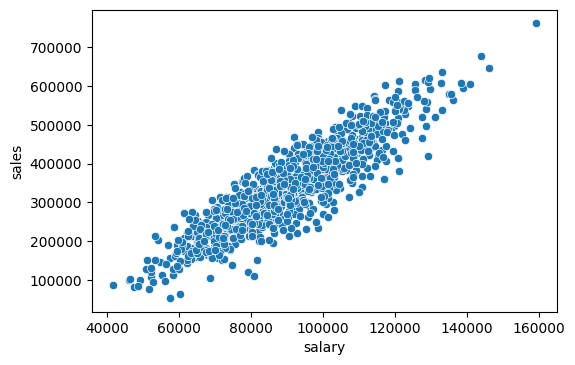

In [5]:
plt.figure(dpi=100)
sns.scatterplot(x='salary', y='sales', data=sales)

### 2.1 Marker Color (Hue)

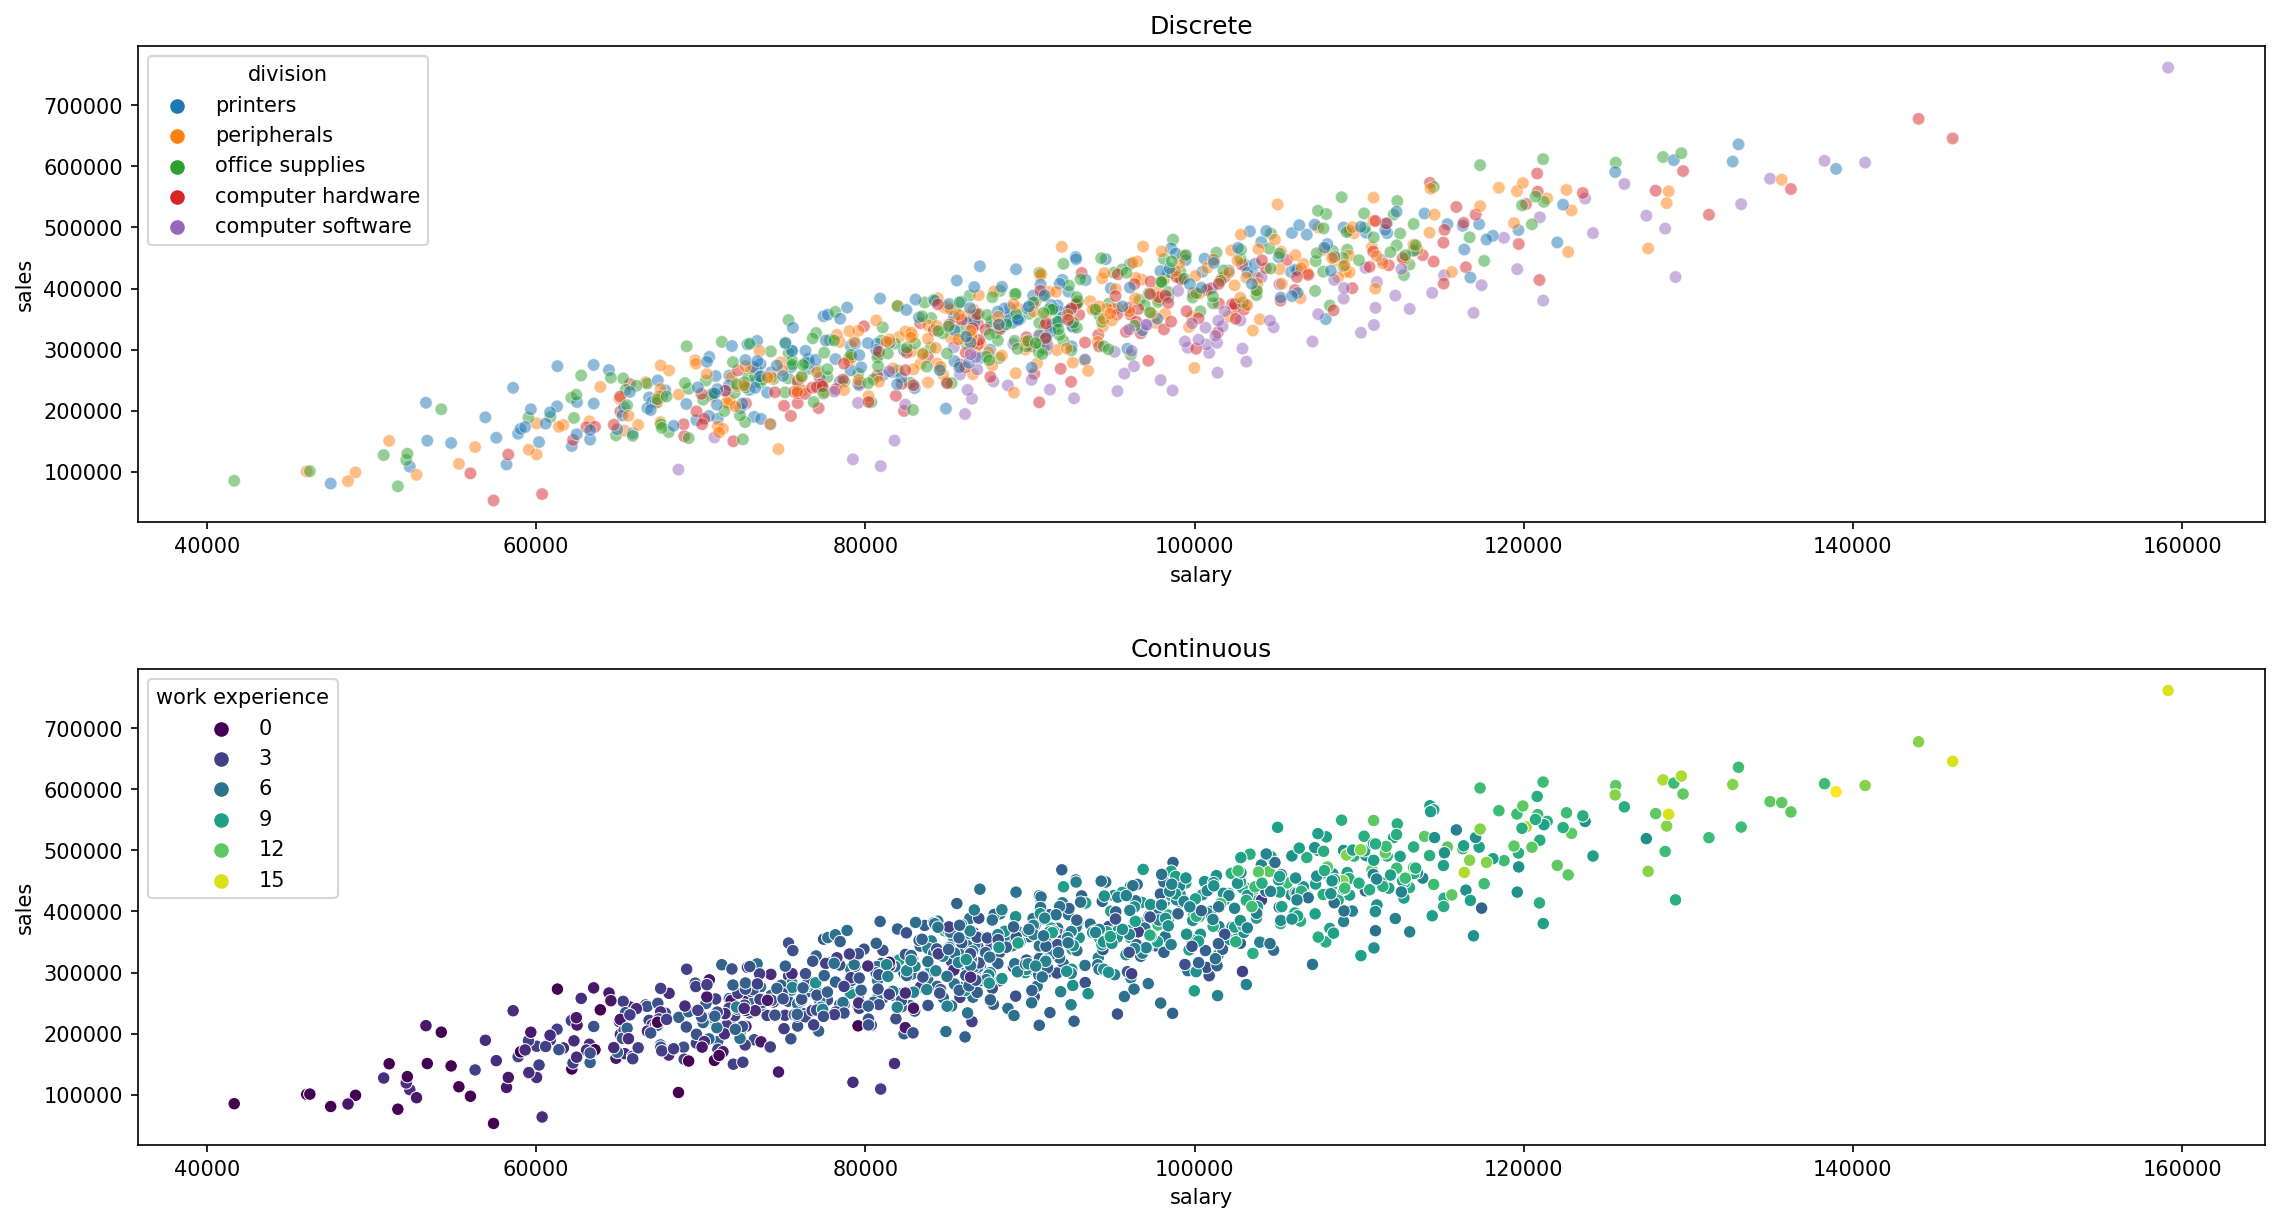

In [6]:
fig, ax = plt.subplots(2, 1, dpi=150, figsize=(16,9))
fig.tight_layout(pad=5.0)

s1 = sns.scatterplot(ax=ax[0], x='salary', y='sales', data=sales, hue='division', alpha=0.5)
s2 = sns.scatterplot(ax=ax[1], x='salary', y='sales', data=sales, hue='work experience', palette='viridis')

s1.set(title="Discrete")
s2.set(title="Continuous")
plt.show()

*You can choose a palette from Matplotlib's cmap: https://matplotlib.org/tutorials/colors/colormaps.html*

### 2.2 Marker Size

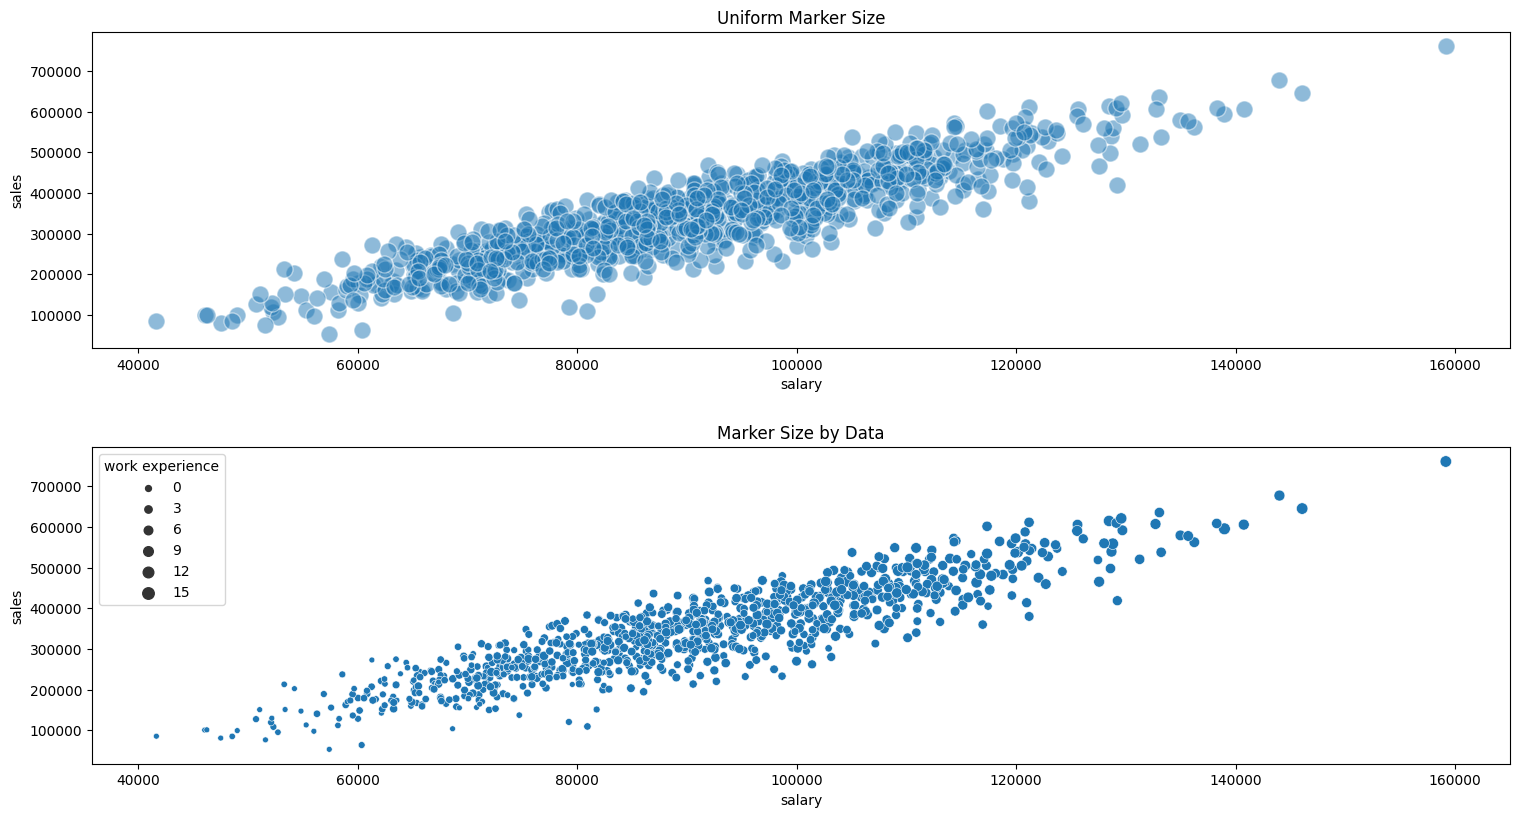

In [7]:
fig, ax = plt.subplots(2, 1, dpi=100, figsize=(16,9))
fig.tight_layout(pad=5.0)

s1 = sns.scatterplot(ax=ax[0], x='salary', y='sales', data=sales, s=150, alpha=0.5)
s2 = sns.scatterplot(ax=ax[1], x='salary', y='sales', data=sales, size='work experience')

s1.set(title="Uniform Marker Size")
s2.set(title="Marker Size by Data")
plt.show()

### 2.3 Marker Style

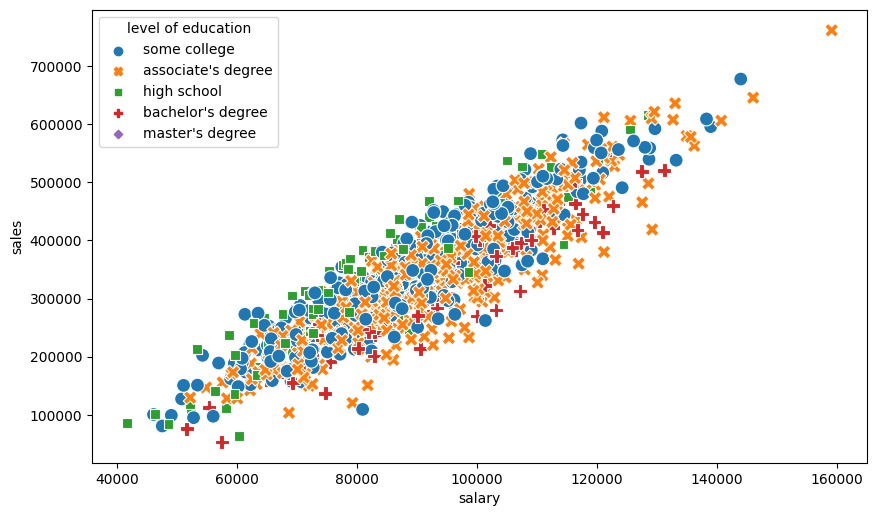

In [8]:
plt.figure(figsize=(10,6), dpi=100)

sns.scatterplot(x='salary', y='sales', data=sales, style='level of education', hue='level of education',s=100)

plt.show()

## 3 Distribution Plots

In [9]:
sales = pd.read_csv("data/dm_office_sales.csv")
sales.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


### 3.1 Rug Plot

<AxesSubplot:xlabel='salary'>

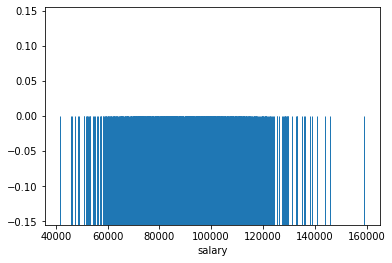

In [10]:
sns.rugplot(x='salary', data=sales, height=0.5)

### 3.2 KDE Plot

In [11]:
np.random.seed(69)
sample_ages = np.random.randint(0,100,200)
sample_ages = pd.DataFrame(sample_ages, columns=['age'])
sample_ages.head()

,age
0,54
1,75
2,73
3,90
4,55


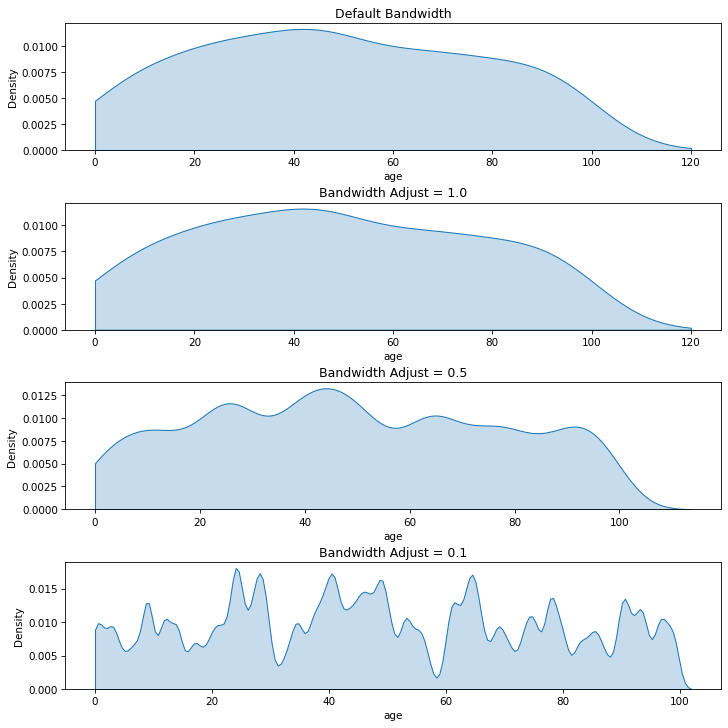

In [12]:
fig, ax = plt.subplots(4, dpi=75, figsize=(10,10))
fig.tight_layout(pad=3.0)

xmin = 0
xmax = 120

s1 = sns.kdeplot(ax=ax[0], data=sample_ages, x='age', clip=[xmin, xmax], fill=True)
s2 = sns.kdeplot(ax=ax[1], data=sample_ages, x='age', clip=[xmin, xmax], fill=True, bw_adjust=1.0)
s3 = sns.kdeplot(ax=ax[2], data=sample_ages, x='age', clip=[xmin, xmax], fill=True, bw_adjust=0.5)
s4 = sns.kdeplot(ax=ax[3], data=sample_ages, x='age', clip=[xmin, xmax], fill=True, bw_adjust=0.1)

s1.set_title('Default Bandwidth')
s2.set_title('Bandwidth Adjust = 1.0')
s3.set_title('Bandwidth Adjust = 0.5')
s4.set_title('Bandwidth Adjust = 0.1')

plt.show()


In [13]:
random_data = np.random.normal(0,1, size=(100,2))
random_data = pd.DataFrame(random_data, columns=['x','y'])
random_data.head()

,x,y
0,1.662010,-0.512963
1,-1.283989,-2.252114
2,-0.872340,0.998412
3,1.884893,0.943592
4,-0.543180,0.238637


<AxesSubplot:xlabel='x', ylabel='y'>

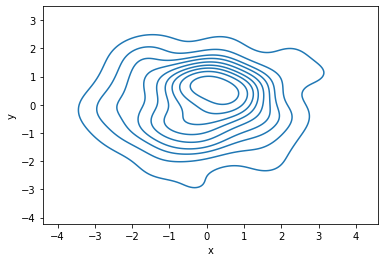

In [14]:
sns.kdeplot(data=random_data, x='x', y='y')

### 3.3 Histogram Plot

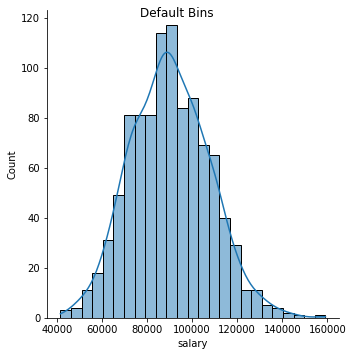

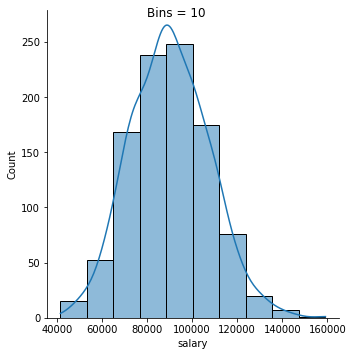

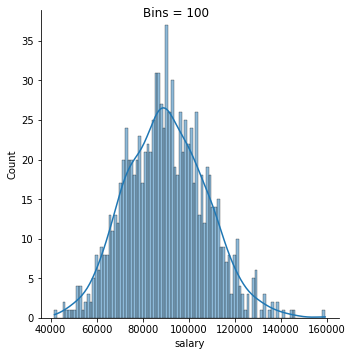

In [15]:
s1 = sns.displot(data=sales, x='salary', kde=True)
s2 = sns.displot(data=sales, x='salary', kde=True, bins=10)
s3 = sns.displot(data=sales, x='salary', kde=True, bins=100)

s1.figure.suptitle('Default Bins')
s2.figure.suptitle('Bins = 10')
s3.figure.suptitle('Bins = 100')

plt.show()


## 4 Categorical Plots

In [16]:
sales = pd.read_csv("data/dm_office_sales.csv")
sales.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


### 4.1 Count Plots

<AxesSubplot:xlabel='level of education', ylabel='count'>

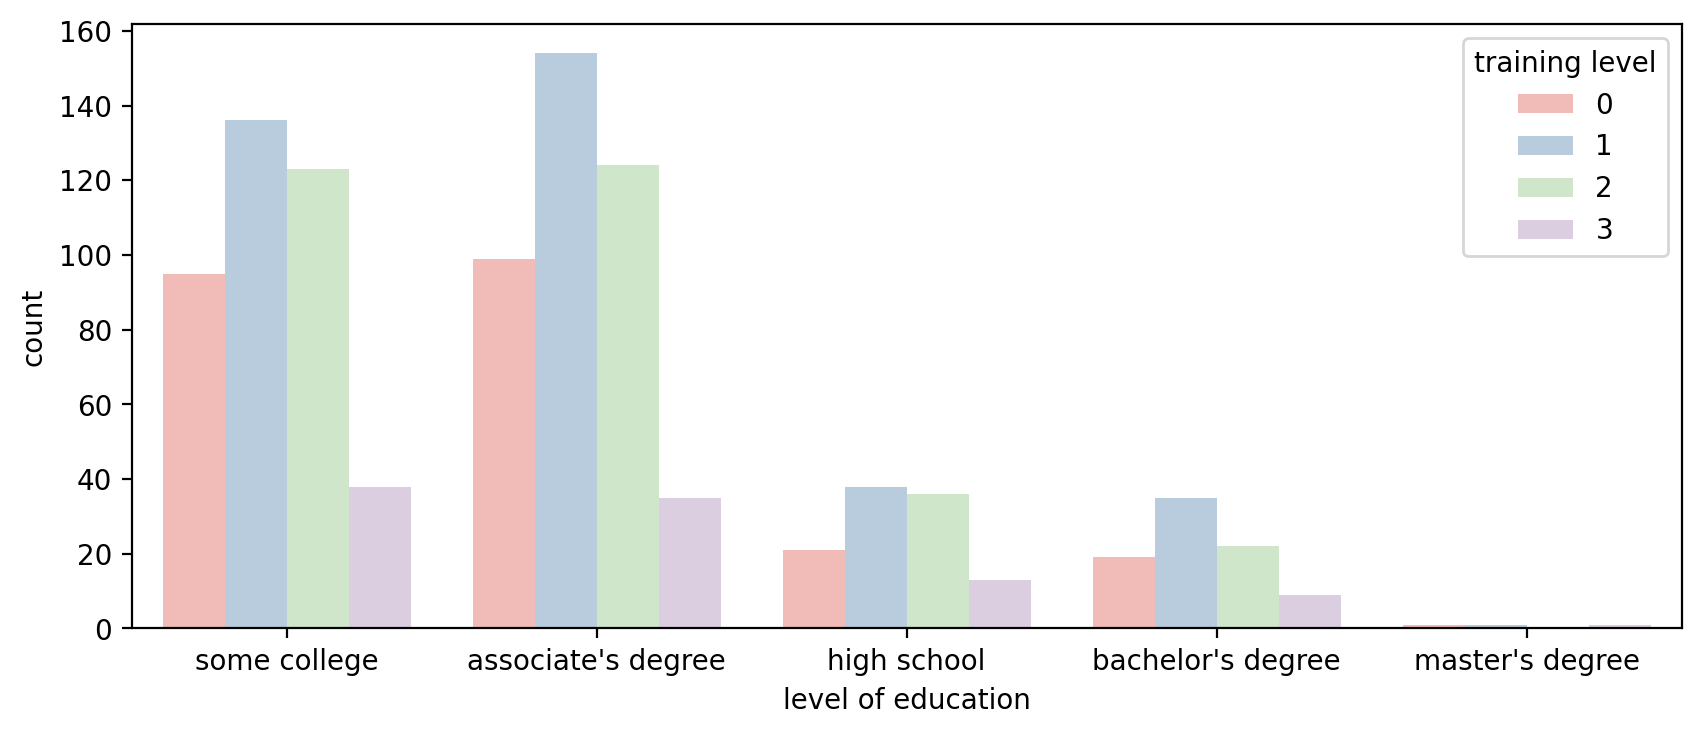

In [17]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='level of education', data=sales, hue='training level', palette='Pastel1')

*You can choose a palette from Matplotlib's cmap: https://matplotlib.org/tutorials/colors/colormaps.html*

### 4.2 Bar Plot

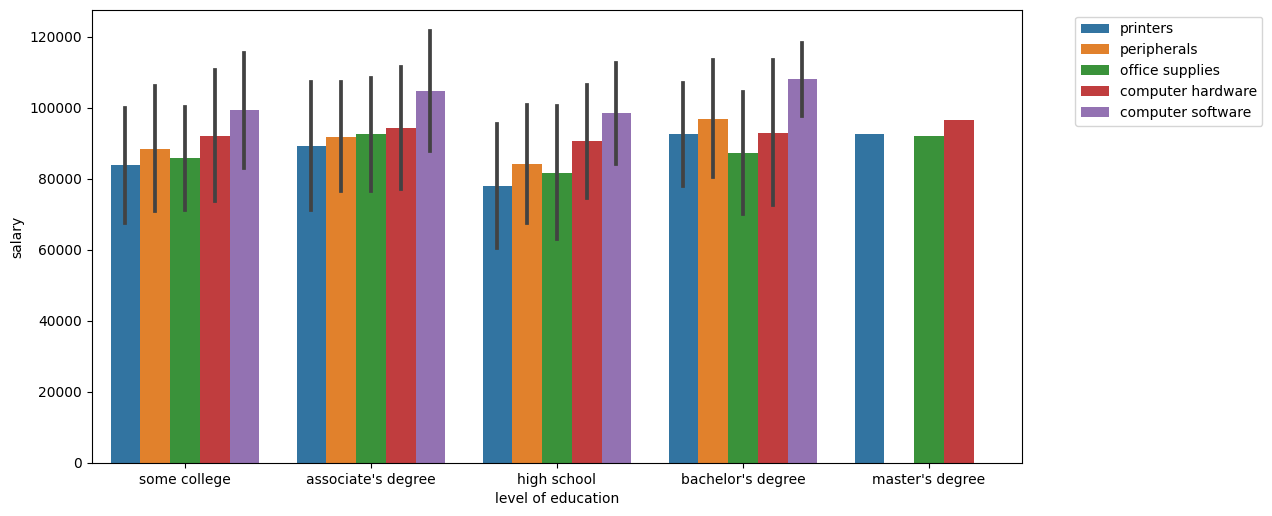

In [18]:
plt.figure(figsize=(12,6), dpi=100)

sns.barplot(x='level of education', y='salary', data=sales, estimator=np.mean, errorbar='sd', hue='division')

plt.legend(bbox_to_anchor=(1.05, 1))

### 4.3 Box Plot

In [19]:
performance = pd.read_csv("data/StudentsPerformance.csv")
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


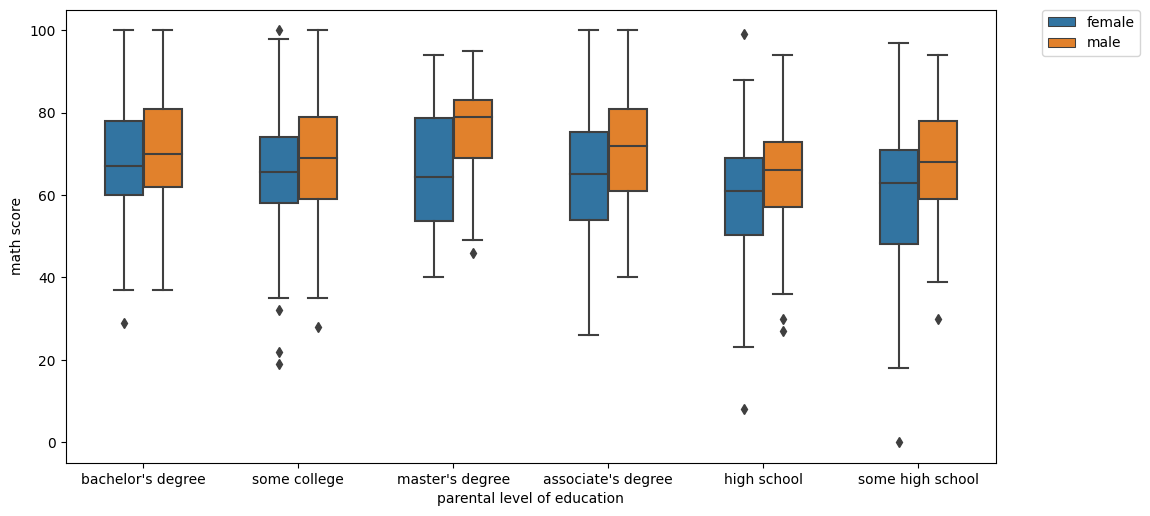

In [20]:
plt.figure(figsize=(12,6), dpi=100)
sns.boxplot(x='parental level of education', y='math score', data=performance, hue='gender', width=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

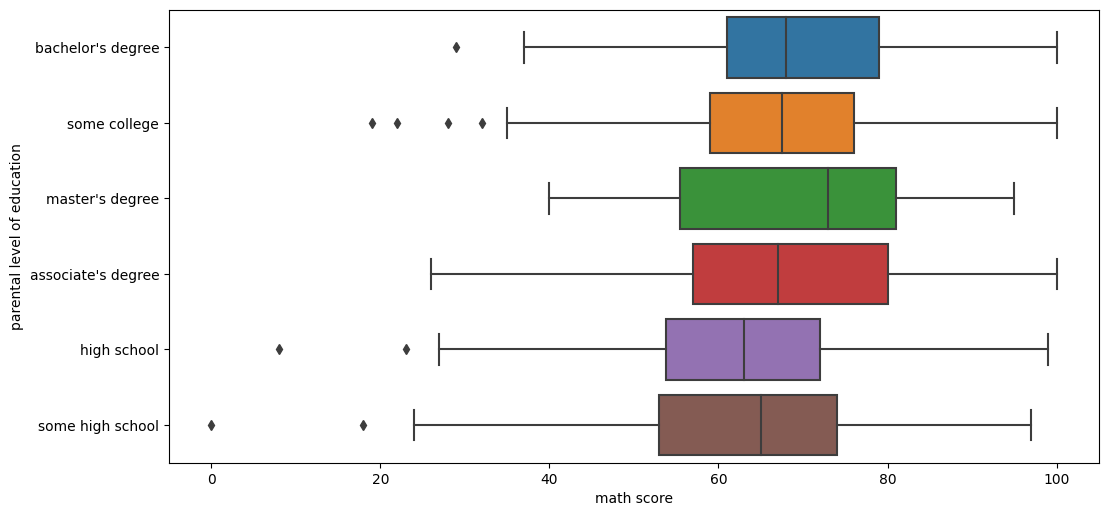

In [21]:
plt.figure(figsize=(12,6), dpi=100)
sns.boxplot(x='math score', y='parental level of education', data=performance, orient='h')
# Don't forget to change x and y if you change orientation

### 4.4 Violin Plots

Combines a Box plot with a KDE plot

In [22]:
performance = pd.read_csv("data/StudentsPerformance.csv")
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

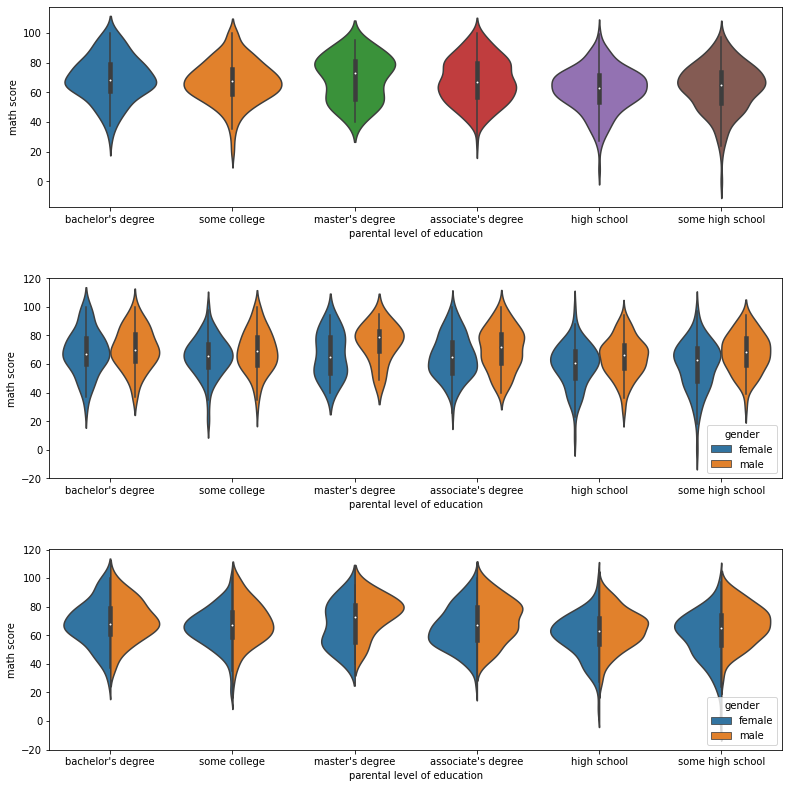

In [23]:
fig, ax = plt.subplots(3, figsize=(12, 12))
fig.tight_layout(pad=5)

xlabel = 'parental level of education'
ylabel = 'math score'

sns.violinplot(ax=ax[0], x=xlabel, y=ylabel, data=performance)
sns.violinplot(ax=ax[1], x=xlabel, y=ylabel, data=performance, hue='gender')
sns.violinplot(ax=ax[2], x=xlabel, y=ylabel, data=performance, hue='gender', split=True)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

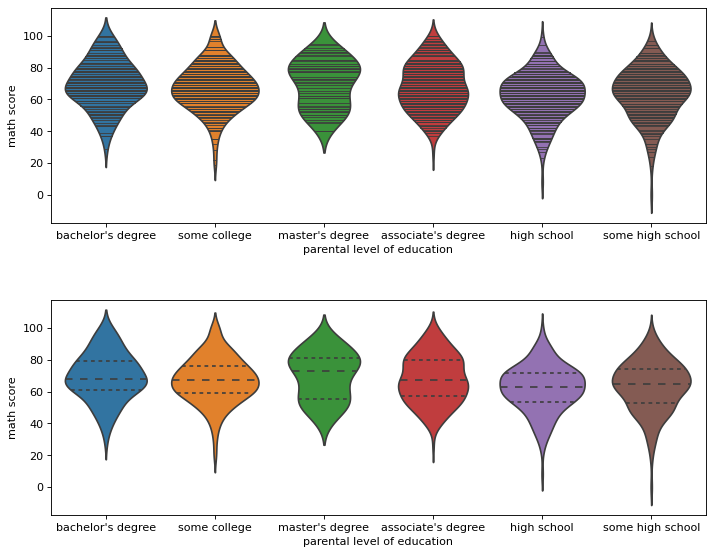

In [24]:
fig, ax = plt.subplots(2, figsize=(10, 8), dpi=80)
fig.tight_layout(pad=5)

xlabel = 'parental level of education'
ylabel = 'math score'

sns.violinplot(ax=ax[1], x=xlabel, y=ylabel, data=performance, inner='quartile')
sns.violinplot(ax=ax[0], x=xlabel, y=ylabel, data=performance, inner='stick')


<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

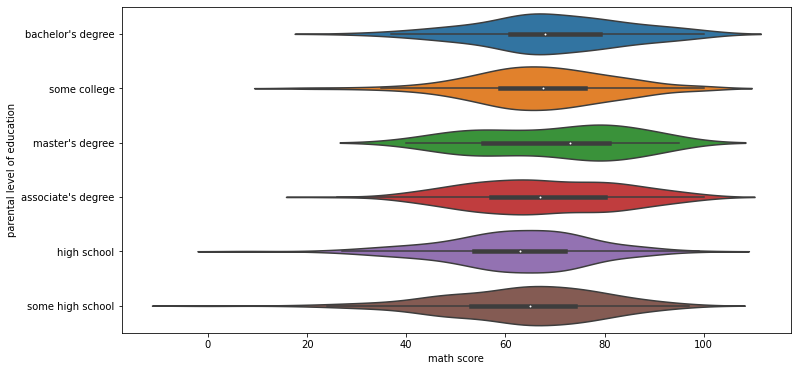

In [25]:
plt.figure(figsize=(12,6))
sns.violinplot(x='math score', y='parental level of education', data=performance)

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

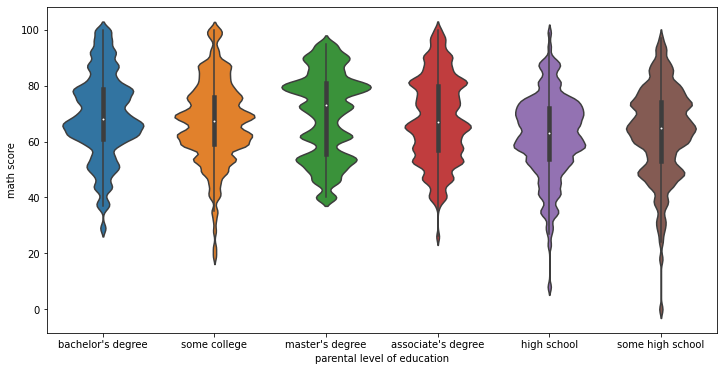

In [26]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education', y='math score', data=performance, bw=0.1)

### 4.5 Swarm Plots

Shows general KDE shape and shows how many data points are present

In [27]:
performance = pd.read_csv("data/StudentsPerformance.csv")
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

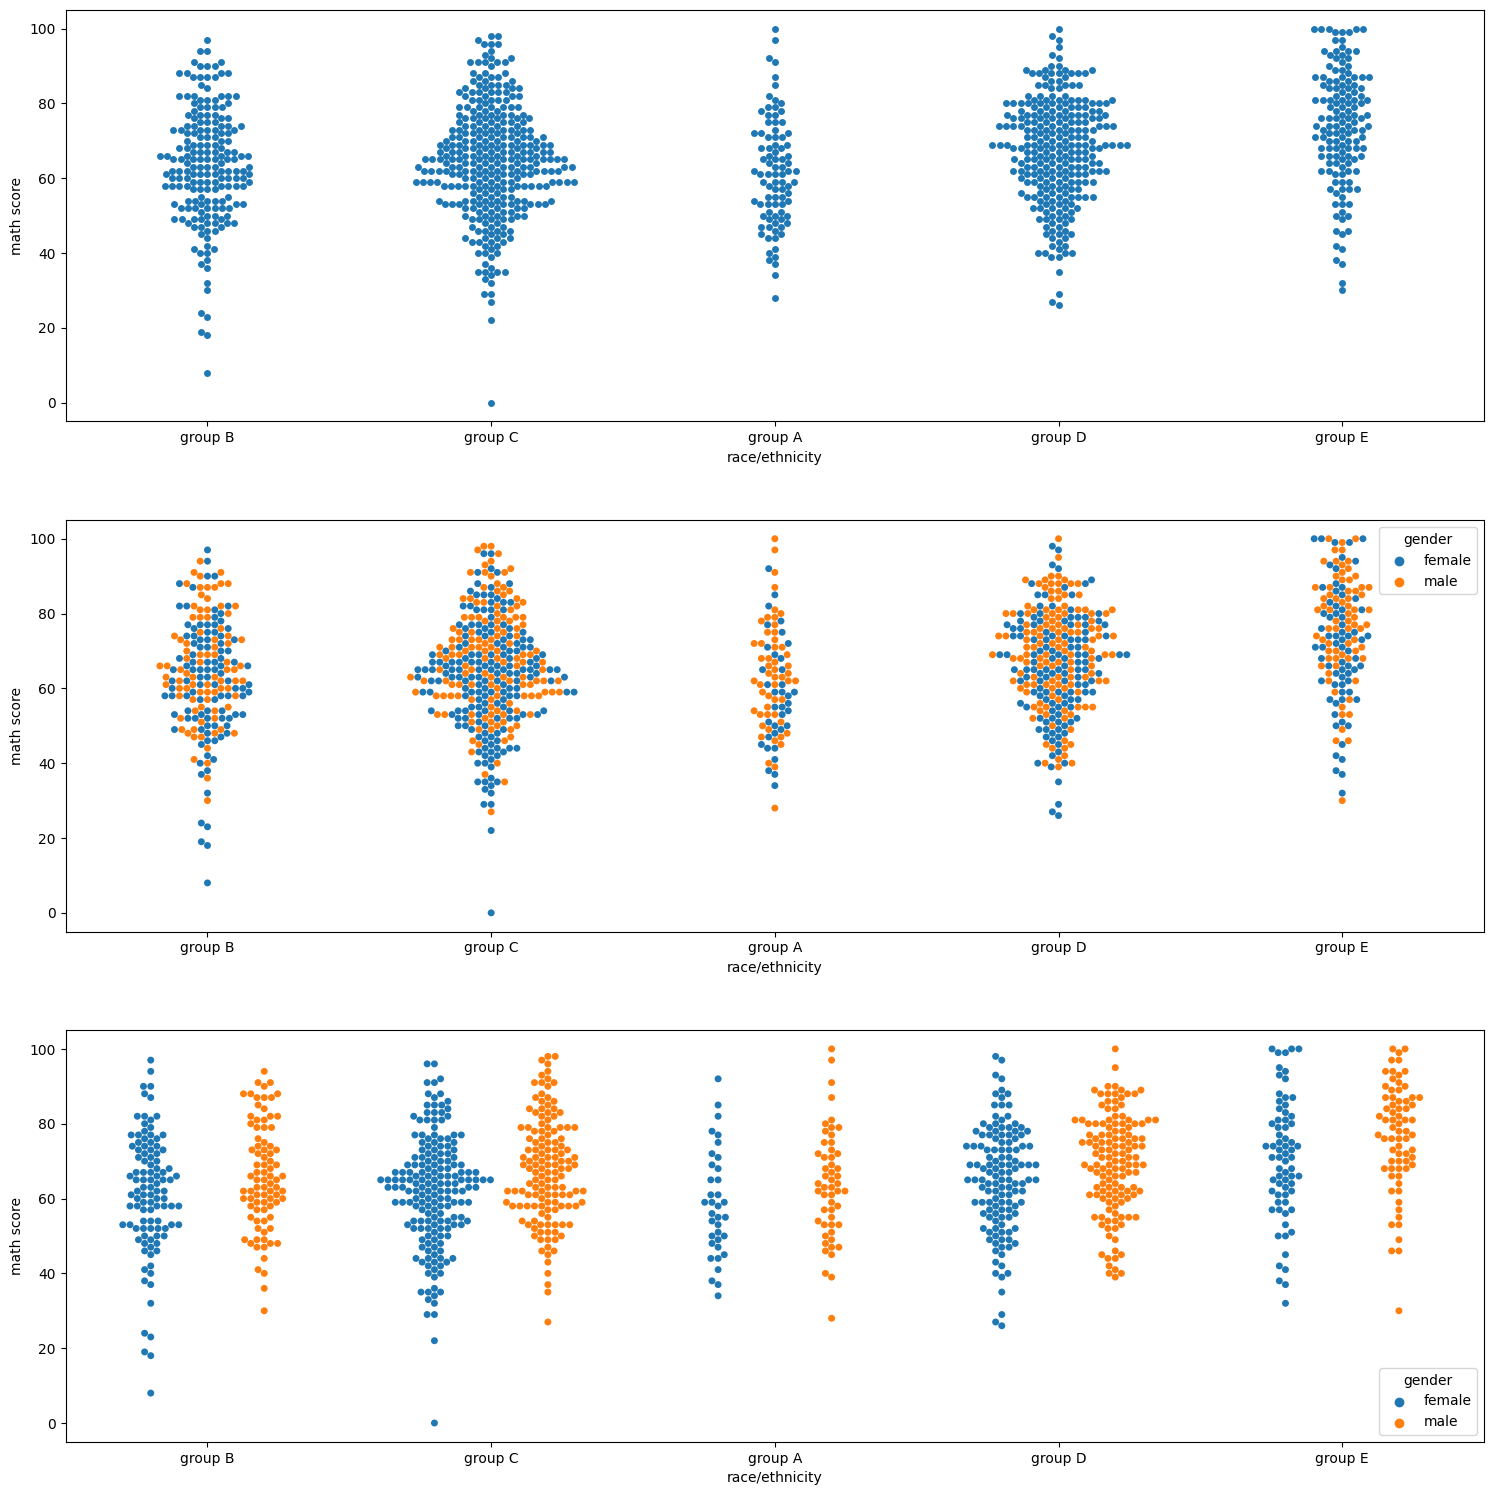

In [28]:
fig, ax = plt.subplots(3, figsize=(16, 16), dpi=100)
fig.tight_layout(pad=5)

xlabel = 'race/ethnicity'
ylabel = 'math score'

sns.swarmplot(ax=ax[0], x=xlabel, y=ylabel, data=performance)
sns.swarmplot(ax=ax[1], x=xlabel, y=ylabel, data=performance, hue='gender')
sns.swarmplot(ax=ax[2], x=xlabel, y=ylabel, data=performance, hue='gender', dodge=True)

### 4.6 Boxenplot (Letter-Value Plot)

Similar to a Box plot, except it shows more quantiles (not just Q1, Q2, Q3)

Official Paper on this plot: https://vita.had.co.nz/papers/letter-value-plot.html


In [29]:
performance = pd.read_csv("data/StudentsPerformance.csv")
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


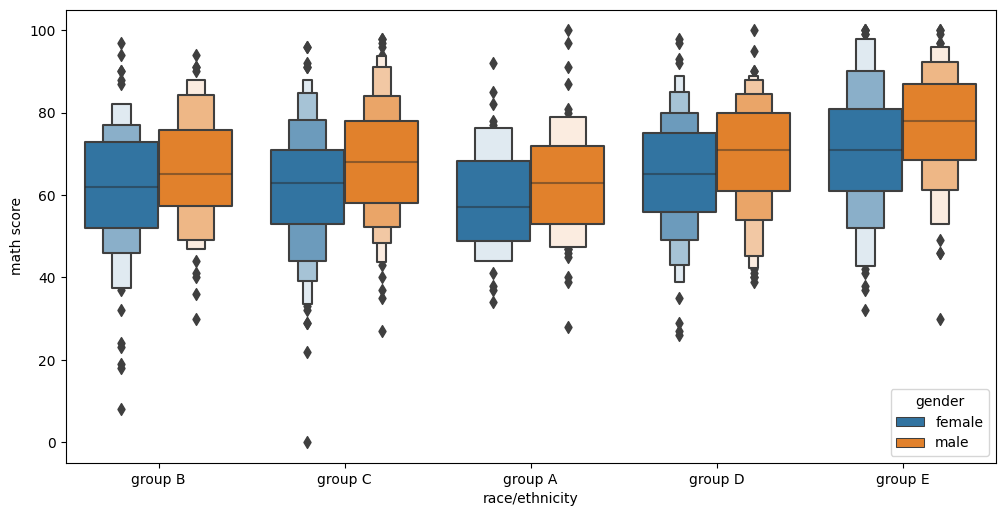

In [30]:
plt.figure(figsize=(12,6), dpi=100)
sns.boxenplot(x='race/ethnicity', y='math score', data=performance, hue='gender')
plt.show()

## 5 Comparison Plots

### 5.1 Joint Plots

In [31]:
performance = pd.read_csv("data/StudentsPerformance.csv")
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


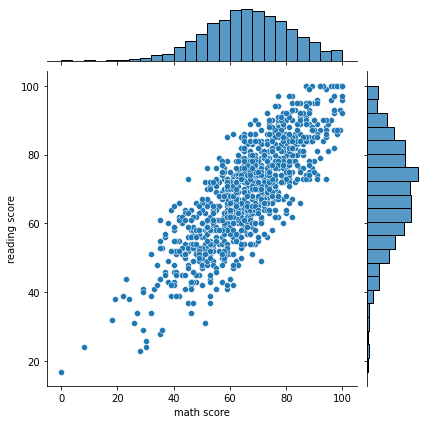

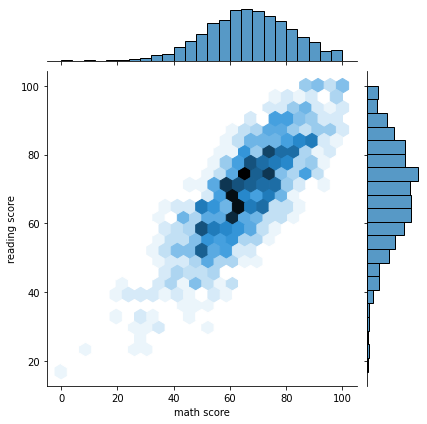

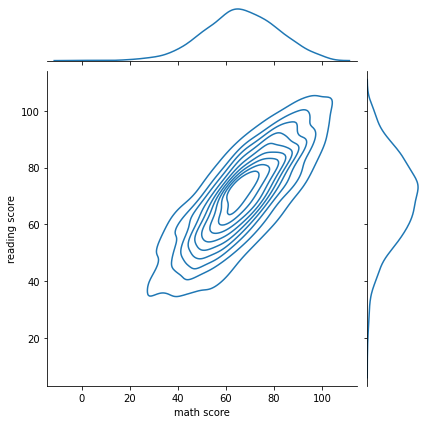

In [32]:
sns.jointplot(x='math score', y='reading score', data=performance)
sns.jointplot(x='math score', y='reading score', data=performance, kind='hex')
sns.jointplot(x='math score', y='reading score', data=performance, kind='kde')


### 5.2 Pair Plots

In [33]:
performance = pd.read_csv("data/StudentsPerformance.csv")
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


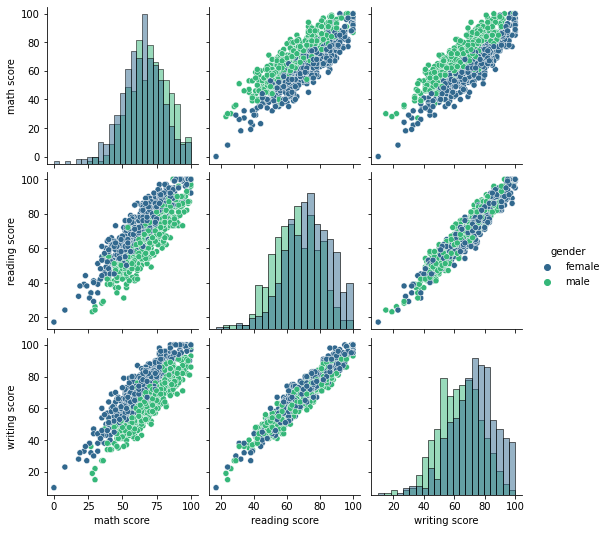

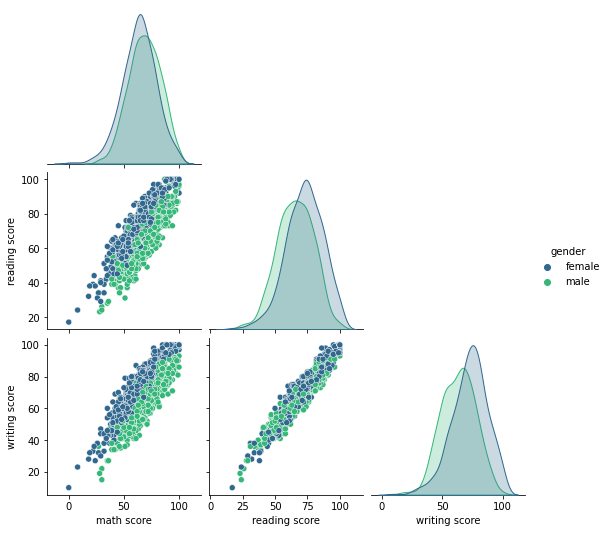

In [34]:
sns.pairplot(data=performance, hue='gender', palette='viridis', diag_kind='hist')
sns.pairplot(data=performance, hue='gender', palette='viridis', corner=True)

## 6 Grids

In _Seaborn_ you can either manually set subplots using matplotlib, or use built in grid objects

In [35]:
performance = pd.read_csv('data/StudentsPerformance.csv')
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 6.1 Pair Grid

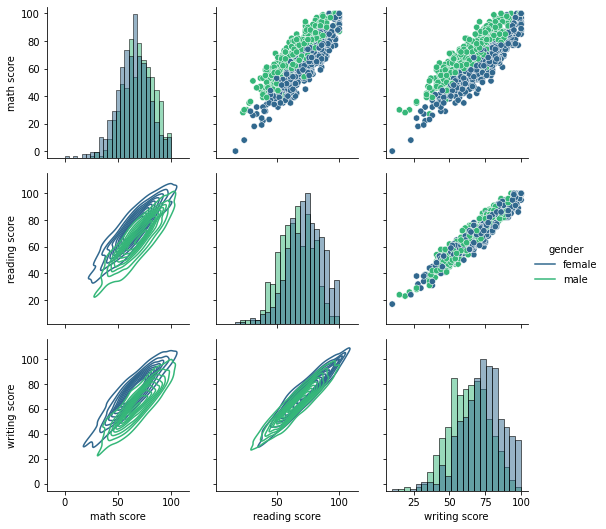

In [36]:
g = sns.PairGrid(data=performance, hue="gender", palette="viridis",hue_kws={"marker": ["o", "+"]})
g = g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.histplot)
g = g.map_lower(sns.kdeplot)
g = g.add_legend();
plt.show()


### 6.2 Facet Grid

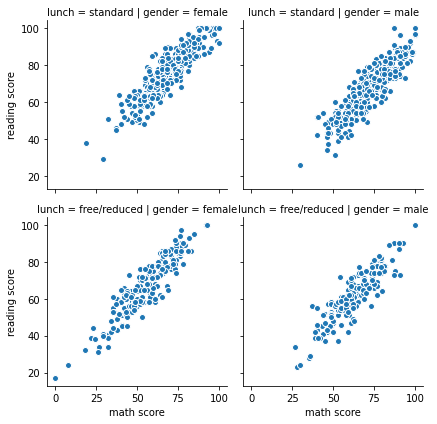

In [37]:
g = sns.FacetGrid(data=performance, col='gender', row='lunch')
g = g.map(plt.scatter, "math score", "reading score", edgecolor="w")
g.add_legend()

### 6.3 Category Plots

Category Plot is a way of automatically distributing the plots according to column values on a grid built on the Facet Grid

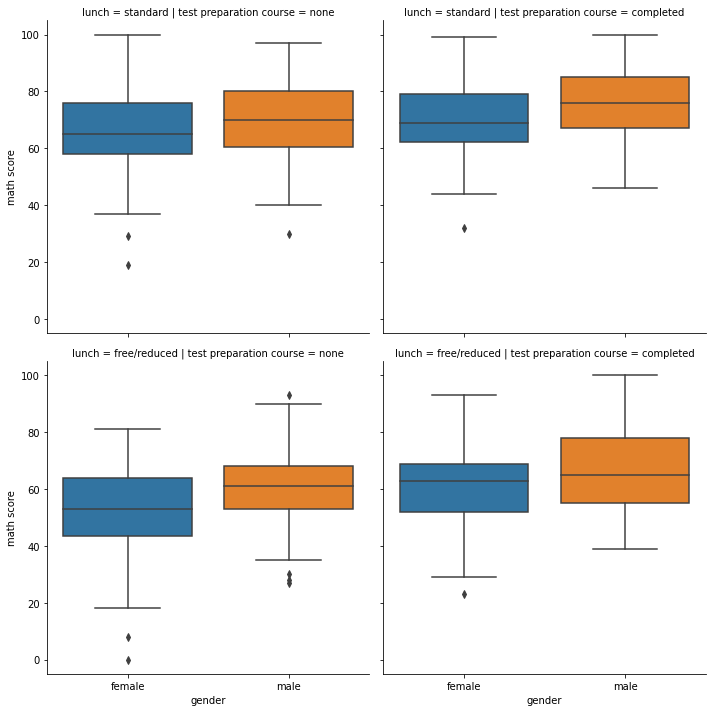

In [38]:
sns.catplot(x='gender', y='math score', data=performance,
            kind='box',row='lunch',col='test preparation course')

## 7 Matrix Plots

Matrix plots are useful for comparing values of in a DataFrame to eachother, for this reason you should only compare values of the same units. In the sample data the life expectancy is in years, while the rest is in the form of a % rate. For this reason the life expectancy column is removed. 

In [39]:
countries = pd.read_csv('data/country_table.csv')
countries = countries.set_index('Countries')

rates = countries.drop('Life expectancy',axis=1)
rates

,Birth rate,Mortality rate,Infant mortality rate,Growth rate
Countries,,,,
AFRICA,32.577,7.837,44.215,24.40
ASIA,15.796,7.030,23.185,8.44
EUROPE,10.118,11.163,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,14.570,8.89
NORTHERN AMERICA,11.780,8.833,5.563,6.11
OCEANIA,16.235,6.788,16.939,12.79
WORLD,17.963,7.601,27.492,10.36


### 7.1 Heat Map

<AxesSubplot:ylabel='Countries'>

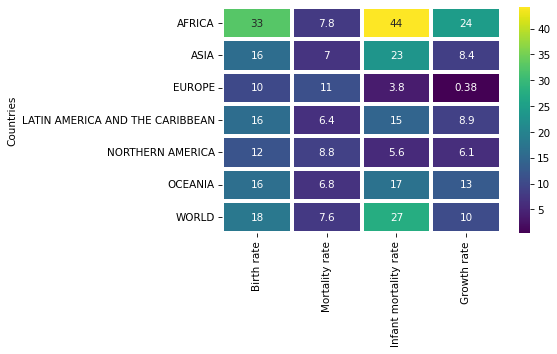

In [40]:
plt.figure(dpi=75)
sns.heatmap(rates, linewidth=2, annot=True, cmap='viridis')

<AxesSubplot:ylabel='Countries'>

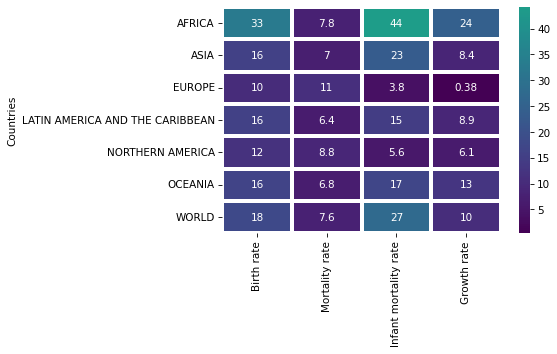

In [41]:
plt.figure(dpi=75)
sns.heatmap(rates, linewidth=2, annot=True, cmap='viridis', center=40)

In [42]:
tips = pd.read_csv("data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


<AxesSubplot:>

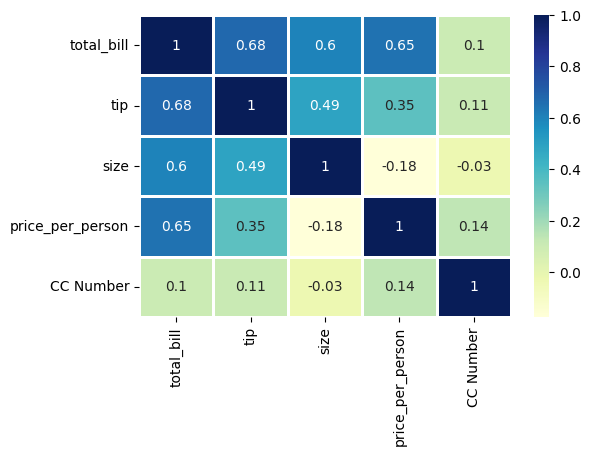

In [43]:
plt.figure(dpi=100)
sns.heatmap(tips.corr(), linewidths=1, annot=True, cmap= 'YlGnBu')

### 7.2 Cluster Map

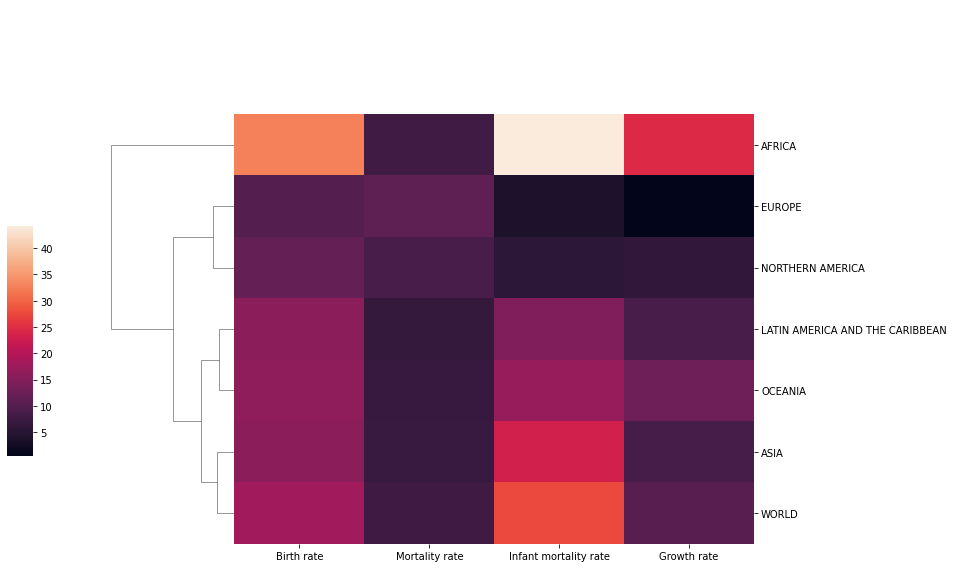

In [44]:
rates.index.set_names('',inplace=True)  # Remove index column name so that it does not show up in the plot
sns.clustermap(rates, col_cluster=False, figsize=(12,8), cbar_pos=(-0.1, .2, .03, .4))